# IO

In [1]:
import PineBioML.IO as IO

In [2]:
# example_PipeLine.py ./input/ example_data.xlsx 0 y

data = IO.read_file("./input/HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

# Train test split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True)

# Data Overview

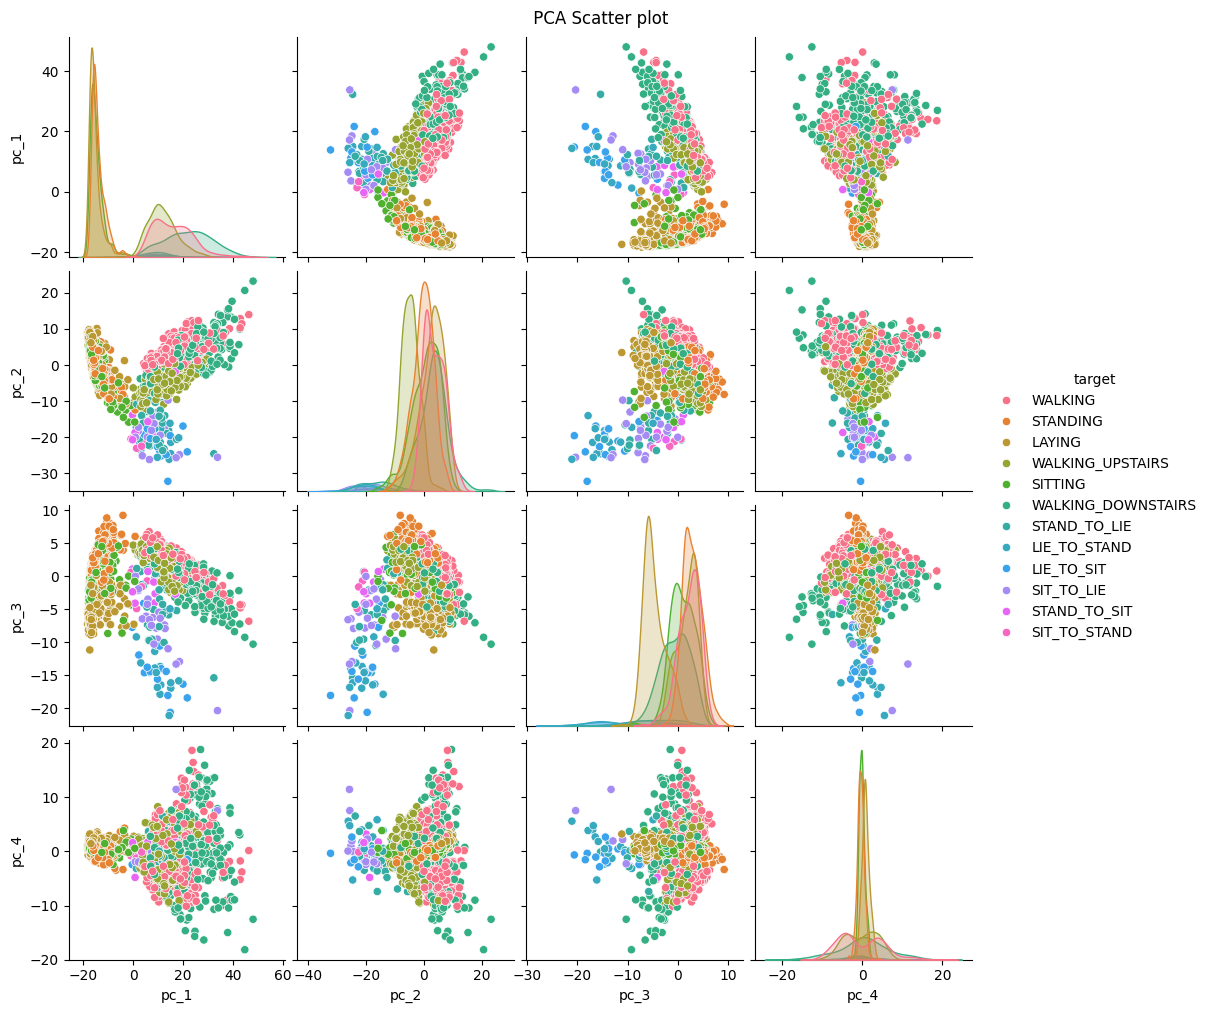

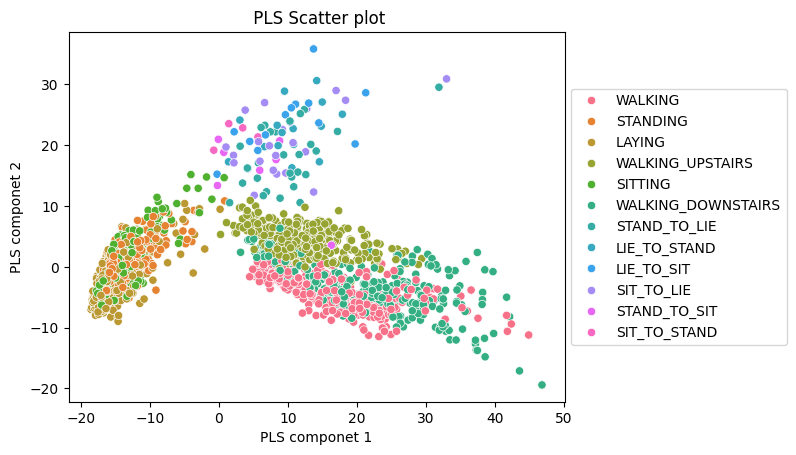

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


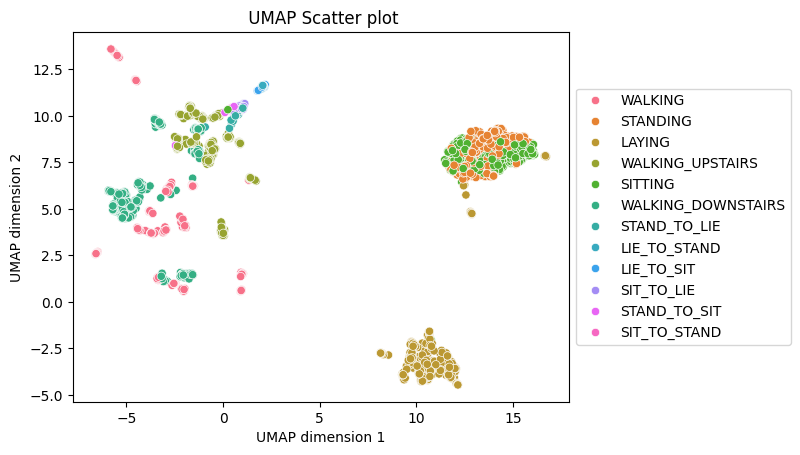

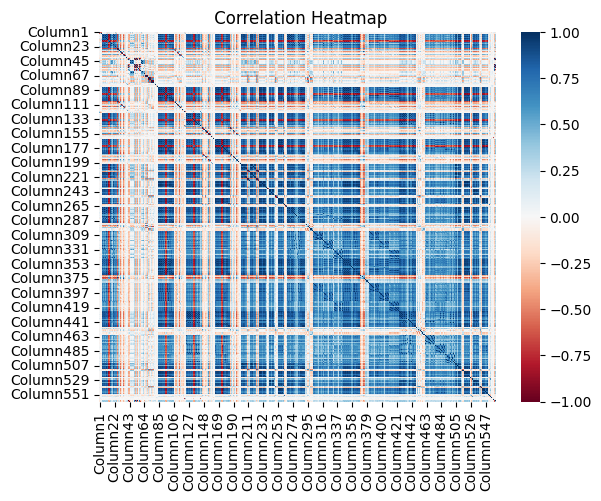

In [4]:
from PineBioML.report.utils import data_overview
data_overview(x_train, y_train, show_fig = True)

# Modeling

In [5]:
from PineBioML.preprocessing import Normalizer
from PineBioML.preprocessing import impute
from PineBioML.selection.classification import ensemble_selector
import PineBioML.model.supervised.Classification as tuner
from sklearn.pipeline import Pipeline

In [6]:
pipe = Pipeline(
    [
        ("Standarization", Normalizer(method="StandardScaler")),
        ("Missing_Value_Processing", impute.simple_imputer(threshold = 0.6, strategy = "constant")),
        ("Feature_Selection", ensemble_selector(z_importance_threshold = 1)),
        ("Modeling", tuner.RandomForest_tuner(target="f1_macro"))
     ]
)

In [7]:
pipe.fit(x_train, y_train)

Using  c45  to select.


100%|██████████| 561/561 [00:04<00:00, 129.46it/s]


c45  is done. Using 4.7011

Using  RF_gini  to select.
RF_gini  is done. Using 8.0704

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done. Using 11.3168

Using  multi_Lasso  to select.
multi_Lasso  is done. Using 36.3585

Using  SVM  to select.
SVM  is done. Using 27.9464

optuna seed 959  |  validation seed 7063  |  model seed 14739
    RandomForest start tuning. it will take a while.
    optuna is better, best trial:  31


Pipeline(steps=[('Standarization',
                 <PineBioML.preprocessing.Normalizer object at 0x000001EF46735110>),
                ('Missing_Value_Processing',
                 <PineBioML.preprocessing.impute.simple_imputer object at 0x000001EF228DC9D0>),
                ('Feature_Selection',
                 <PineBioML.selection.classification.ensemble_selector object at 0x000001EF46735850>),
                ('Modeling',
                 <PineBioML.model.supervised.Classification.RandomForest_tuner object at 0x000001EF5CD939D0>)])

# Evaluation

In [8]:
from PineBioML.report.utils import classification_summary

classification_summary(y_valid, pipe.predict_proba(x_valid), show_fig=False)

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


                   precision    recall  f1-score support
LAYING                   1.0       1.0       1.0   179.0
LIE_TO_SIT          0.428571  0.272727  0.333333    11.0
LIE_TO_STAND          0.4375  0.583333       0.5    12.0
SITTING             0.900621  0.960265  0.929487   151.0
SIT_TO_LIE              0.75       0.9  0.818182    10.0
SIT_TO_STAND             1.0  0.666667       0.8     6.0
STANDING            0.959064  0.896175  0.926554   183.0
STAND_TO_LIE        0.555556  0.789474  0.652174    19.0
STAND_TO_SIT        0.666667  0.266667  0.380952    15.0
WALKING             0.953216  0.947674  0.950437   172.0
WALKING_DOWNSTAIRS  0.938931  0.960938  0.949807   128.0
WALKING_UPSTAIRS    0.943396  0.949367  0.946372   158.0
                                                        
macro avg            0.79446  0.766107  0.765608  1044.0
weighted avg         0.92693  0.925287  0.923605  1044.0
accuracy                                0.925287  1044.0


<Figure size 640x480 with 0 Axes>

# Saving Model

In [9]:
# save model
IO.save_model(pipe, "./output/models/", "MostInOne", overide=True)

# Reload model

In [10]:
# load model
presaved_model = IO.load_model("./output/models/MostInOne")

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


                   precision    recall  f1-score support
LAYING                   1.0       1.0       1.0   179.0
LIE_TO_SIT          0.428571  0.272727  0.333333    11.0
LIE_TO_STAND          0.4375  0.583333       0.5    12.0
SITTING             0.900621  0.960265  0.929487   151.0
SIT_TO_LIE              0.75       0.9  0.818182    10.0
SIT_TO_STAND             1.0  0.666667       0.8     6.0
STANDING            0.959064  0.896175  0.926554   183.0
STAND_TO_LIE        0.555556  0.789474  0.652174    19.0
STAND_TO_SIT        0.666667  0.266667  0.380952    15.0
WALKING             0.953216  0.947674  0.950437   172.0
WALKING_DOWNSTAIRS  0.938931  0.960938  0.949807   128.0
WALKING_UPSTAIRS    0.943396  0.949367  0.946372   158.0
                                                        
macro avg            0.79446  0.766107  0.765608  1044.0
weighted avg         0.92693  0.925287  0.923605  1044.0
accuracy                                0.925287  1044.0


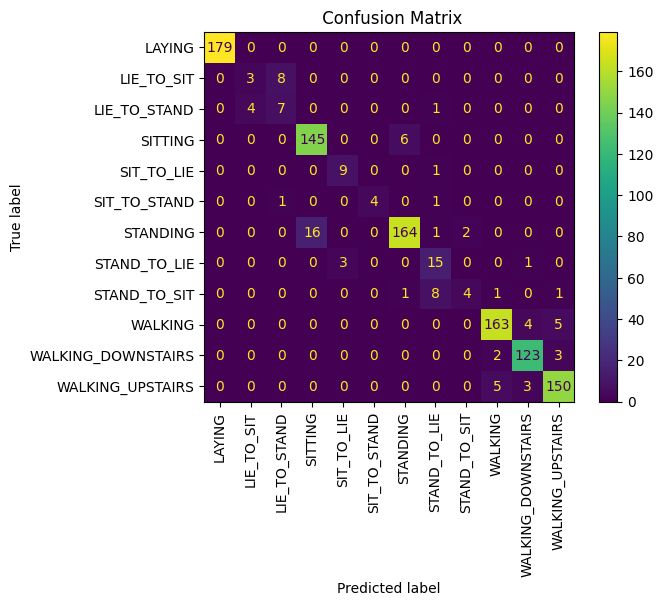

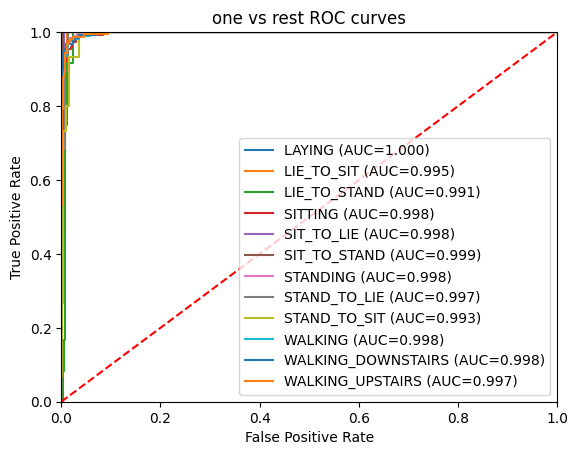

In [11]:
classification_summary(y_valid, presaved_model.predict_proba(x_valid)) 